In [61]:
import pandas as pd
df=pd.read_csv("/content/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df.dropna(inplace=True)

In [63]:
X =df.drop(columns=["Outcome"])
Y = df["Outcome"]

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,recall_score,f1_score

In [66]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)


DecisionTreeClassifier()

In [67]:
Y_pred=tree.predict(X_test)


In [68]:
acc= accuracy_score(Y_test,Y_pred)
print(acc)

0.7662337662337663


In [69]:
prec=precision_recall_curve(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)

In [70]:
print(prec)

(array([0.35714286, 0.66101695, 1.        ]), array([1.        , 0.70909091, 0.        ]), array([0, 1]))


In [71]:
print(f1)

0.6842105263157895


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[79 20]
 [16 39]]


Text(95.72222222222221, 0.5, 'True')

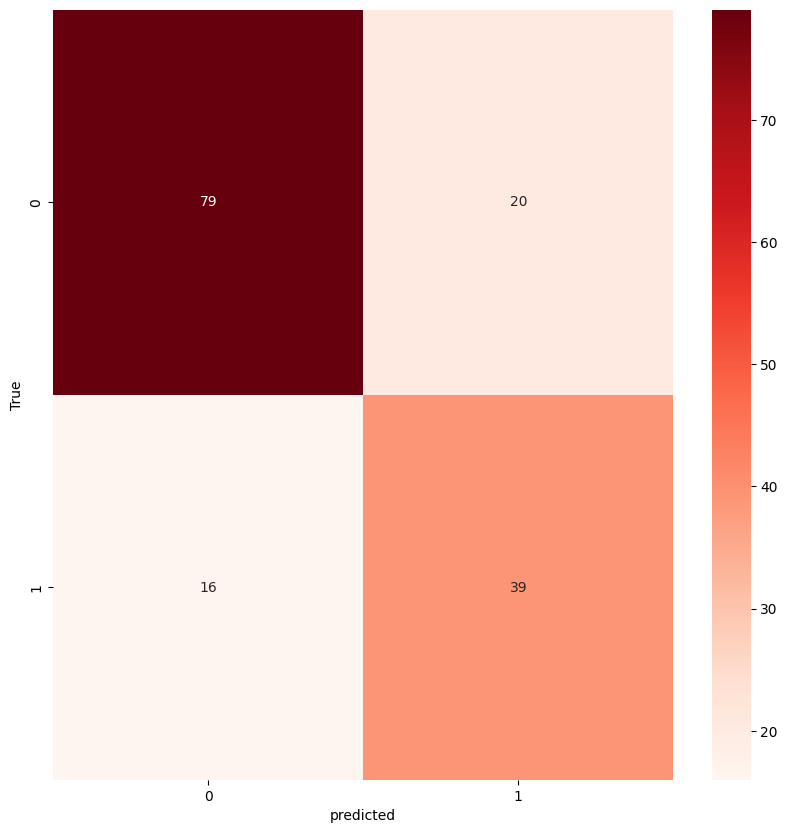

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds")
plt.xlabel("predicted")
plt.ylabel("True")

<function matplotlib.pyplot.show(close=None, block=None)>

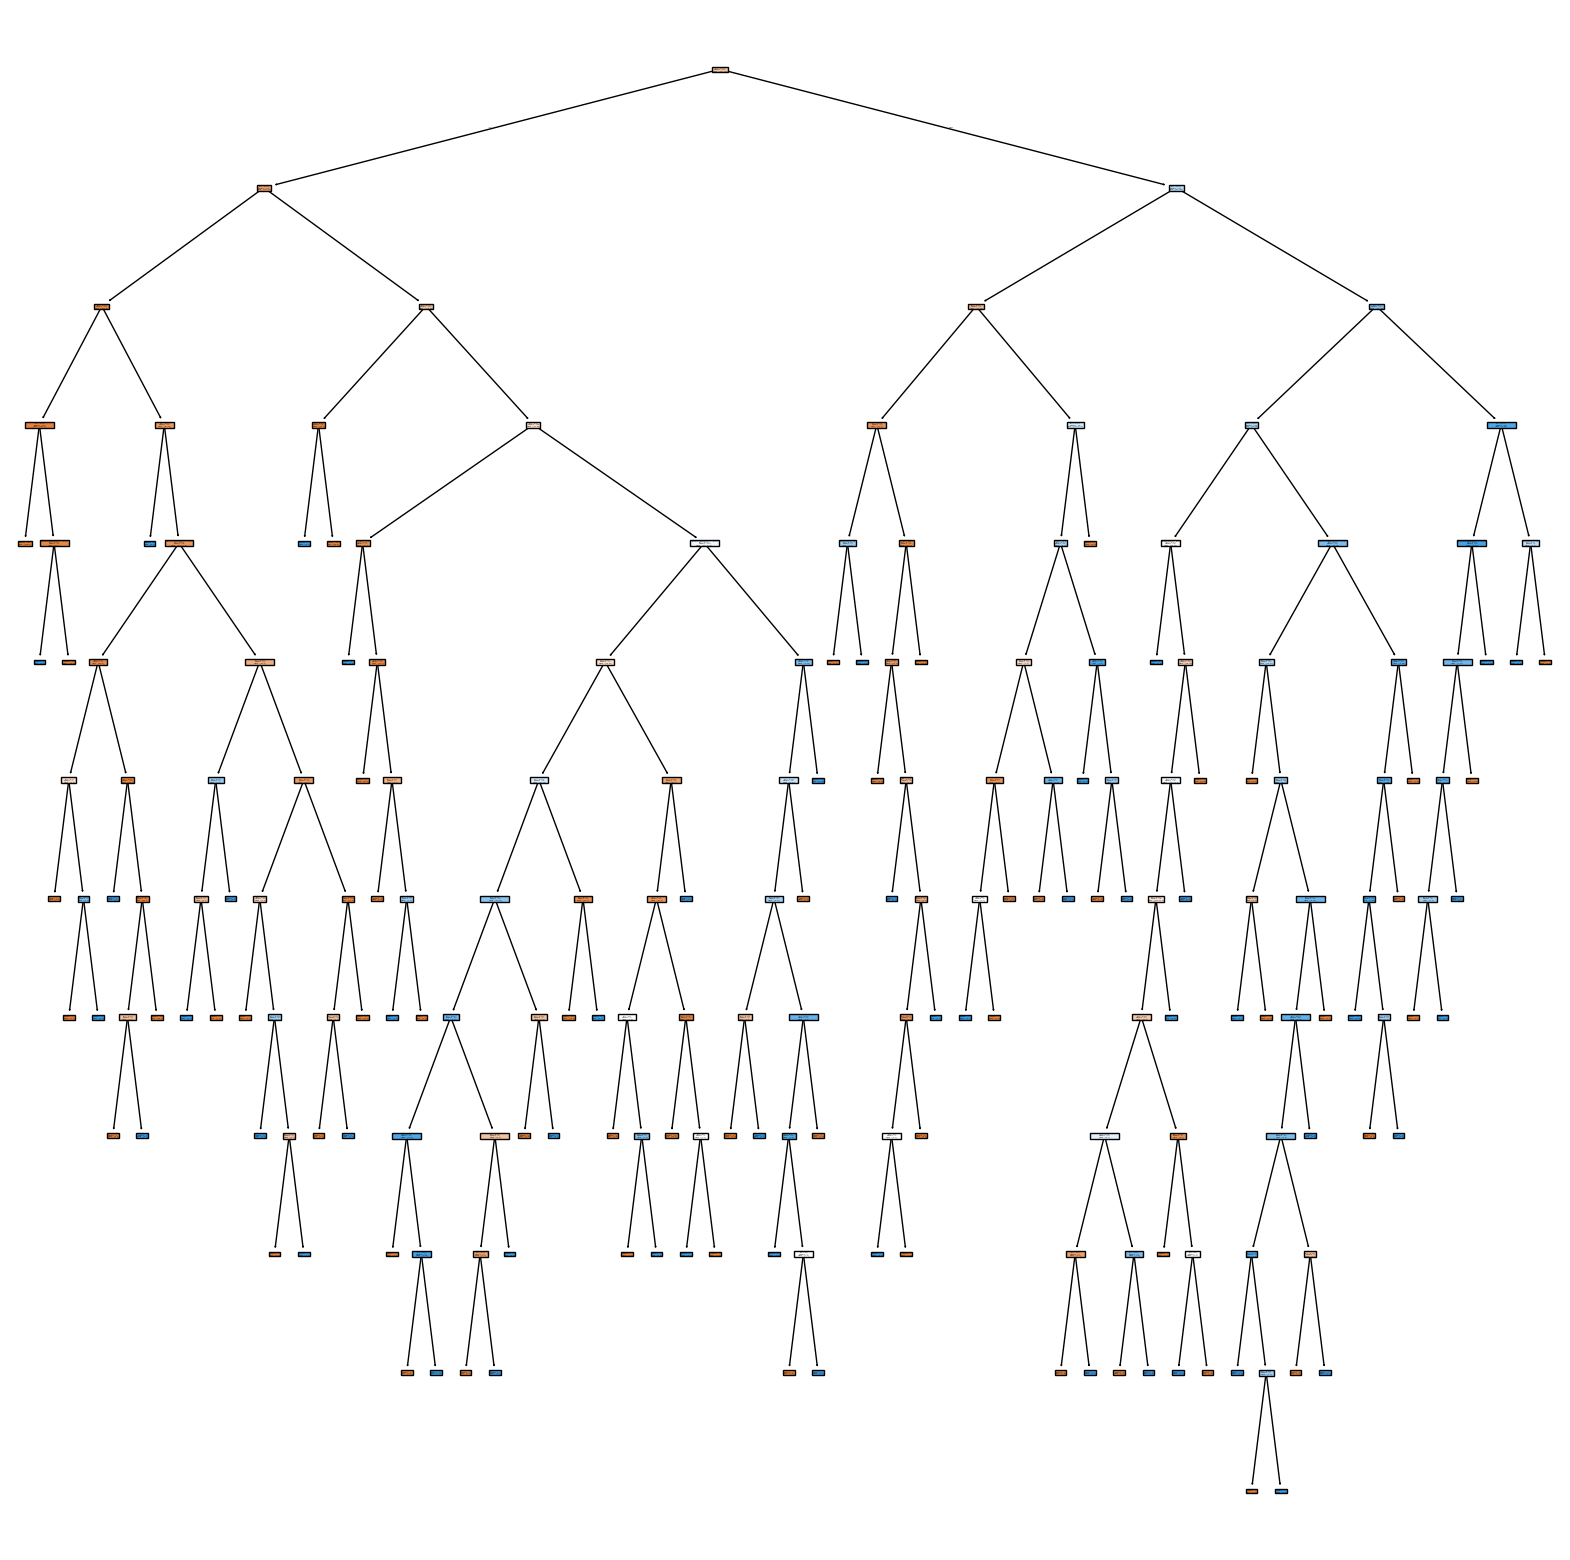

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(tree,filled=True,feature_names=X.columns)
plt.show